# Paso 1. Preprocesamiento completo (obtención de las imágenes HR)

In [1]:
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom


# Directorio raíz de las imágenes .nii.gz
directorio_raiz = '/home/veronicabp/Dataset/OASIS-3/P6/'

# Obtener una lista de carpetas en el directorio raíz
carpetas_originales = [d for d in os.listdir(directorio_raiz) if os.path.isdir(os.path.join(directorio_raiz, d))]

# Procesar cada carpeta
for carpeta_original in carpetas_originales:
    carpeta_orig_path = os.path.join(directorio_raiz, carpeta_original)
    
    # Crear carpetas para las imágenes normalizadas e interpoladas, consideradas HR
    carpeta_HR = "img_HR"
    carpeta_HR_path = os.path.join(directorio_raiz, carpeta_HR)
    carpeta_destino = carpeta_original + "_HR"
    carpeta_dest_path = os.path.join(carpeta_HR_path, carpeta_destino)
    os.makedirs(carpeta_dest_path, exist_ok=True)
    
    # Obtener una lista de todas las imágenes .nii.gz en la carpeta original
    imagenes_nii = [f for f in os.listdir(carpeta_orig_path) if f.endswith(".nii.gz")]
    
    # Procesar cada imagen
    for imagen_nii in imagenes_nii:
        # Cargar la imagen .nii.gz
        imagen = nib.load(os.path.join(carpeta_orig_path, imagen_nii))
        data = imagen.get_fdata()
        
        
        # Cambiar la resolución aplicando interpolación
        dimensiones_originales = data.shape
        nuevas_dimensiones = (206,244,198)

        factores_escala = [
            nuevo / original for nuevo, original in zip(nuevas_dimensiones, dimensiones_originales)
        ]

        data_interpolated = zoom(data, factores_escala, order=3, mode='nearest')
        
        
        # Normalizar los valores de píxeles entre 0 y 1
        data_normalized = (data_interpolated - np.min(data_interpolated)) / (np.max(data_interpolated) - np.min(data_interpolated))
        
        # Crear una nueva imagen NiBabel con los datos procesados
        imagen_P = nib.Nifti1Image(data_normalized, imagen.affine)
              
        # Guardar la imagen procesada en la carpeta de destino
        imagen_P_file = os.path.join(carpeta_dest_path, imagen_nii.split(".nii.gz")[0] + "_HR.nii.gz")
        nib.save(imagen_P, imagen_P_file)

print("Proceso completado.")

Proceso completado.


# Paso 2. Downsampling de las imágenes (obtención de las imágenes LR)

In [3]:
import os
import nibabel as nib
import numpy as np

# Directorio raíz de las imágenes .nii.gz
directorio_raiz = '/home/veronicabp/Dataset/OASIS-3/P6/img_HR/'


# Obtener una lista de carpetas en el directorio raíz
carpetas_originales = [d for d in os.listdir(directorio_raiz) if os.path.isdir(os.path.join(directorio_raiz, d))]

# Carpeta raíz para las nuevas imágenes LR
carpeta_LR_raiz = carpeta_LR_raiz = os.path.join(os.path.dirname(os.path.dirname(directorio_raiz)), "img_LR")
os.makedirs(carpeta_LR_raiz, exist_ok=True)

# Procesar cada carpeta
for carpeta_original in carpetas_originales:
    carpeta_orig_path = os.path.join(directorio_raiz, carpeta_original)
    
    # Crear una carpeta para las nuevas imágenes LR dentro de la carpeta raíz
    carpeta_destino = carpeta_original.replace("_HR", "") + "_LR"
    carpeta_dest_path = os.path.join(carpeta_LR_raiz, carpeta_destino)
    os.makedirs(carpeta_dest_path, exist_ok=True)
    
    # Obtener una lista de todas las imágenes .nii.gz en la carpeta original
    imagenes_nii = [f for f in os.listdir(carpeta_orig_path) if f.endswith(".nii.gz")]
    
    # Procesar cada imagen
    for imagen_nii in imagenes_nii:

        # Cargar la imagen .nii.gz
        imagen = nib.load(os.path.join(carpeta_orig_path, imagen_nii))
        
        # Obtener los datos de la imagen
        data = imagen.get_fdata()
        
        # Definir el factor de reducción en cada dimensión
        factor_de_reduccion = (2, 2, 2)
        
        # Realizar el downsampling
        data_downsampled = data[::factor_de_reduccion[0], ::factor_de_reduccion[1], ::factor_de_reduccion[2]]
        
        # Crear una nueva imagen NiBabel
        imagen_downsampled = nib.Nifti1Image(data_downsampled, imagen.affine)
        nuevo_nombre= imagen_nii.split("_HR.nii.gz")[0] + "_LR.nii.gz"
        
        # Crear una nueva carpeta con el mismo nombre que el archivo
        carpeta_igual = os.path.join(carpeta_dest_path, nuevo_nombre.replace('_LR.nii.gz',''))
        
        # Verificar si la carpeta ya exite, si no, crearla
        if not os.path.exists(carpeta_igual):
            os.makedirs(carpeta_igual)
        
        # Guardar la imagen LR en la carpeta de destino con su mismo nombre
        imagen_LR_file = os.path.join(carpeta_igual, nuevo_nombre)
        nib.save(imagen_downsampled, imagen_LR_file)
             
print("Proceso completado.")


Proceso completado.


# Paso 2.1 Filtrado Gaussiano (opcional)

Hacer este paso alternativamente al paso 2, no después de él. 

In [1]:
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import gaussian_filter

# Directorio raíz de las imágenes .nii.gz
directorio_raiz = '/home/veronicabp/Dataset/ATLAS_2/P11/imagenes/img_HR/'


# Obtener una lista de carpetas en el directorio raíz
carpetas_originales = [d for d in os.listdir(directorio_raiz) if os.path.isdir(os.path.join(directorio_raiz, d))]

# Carpeta raíz para las nuevas imágenes LR
carpeta_LR_raiz = carpeta_LR_raiz = os.path.join(os.path.dirname(os.path.dirname(directorio_raiz)), "img_LR")
os.makedirs(carpeta_LR_raiz, exist_ok=True)

# Procesar cada carpeta
for carpeta_original in carpetas_originales:
    carpeta_orig_path = os.path.join(directorio_raiz, carpeta_original)
    
    # Crear una carpeta para las nuevas imágenes LR dentro de la carpeta raíz
    carpeta_destino = carpeta_original.replace("_HR", "") + "_LR"
    carpeta_dest_path = os.path.join(carpeta_LR_raiz, carpeta_destino)
    os.makedirs(carpeta_dest_path, exist_ok=True)
    
    # Obtener una lista de todas las imágenes .nii.gz en la carpeta original
    imagenes_nii = [f for f in os.listdir(carpeta_orig_path) if f.endswith(".nii.gz")]
    
    # Procesar cada imagen
    for imagen_nii in imagenes_nii:

        # Cargar la imagen .nii.gz
        imagen = nib.load(os.path.join(carpeta_orig_path, imagen_nii))
        
        # Obtener los datos de la imagen
        data = imagen.get_fdata()
        
        # Definir el factor de reducción en cada dimensión
        factor_de_reduccion = (2, 2, 2)
        
        # Realizar el downsampling
        data_downsampled = data[::factor_de_reduccion[0], ::factor_de_reduccion[1], ::factor_de_reduccion[2]]
        
        # Aplicar el filtrado Gaussiano
        sigma = 2 
        data_downsampled_smoothed = gaussian_filter(data_downsampled, sigma=sigma)
        
        # Crear una nueva imagen NiBabel
        imagen_downsampled_smoothed = nib.Nifti1Image(data_downsampled_smoothed, imagen.affine)
        nuevo_nombre= imagen_nii.split("_HR.nii.gz")[0] + "_LR_smoothed.nii.gz"
        
        # Crear una nueva carpeta con el mismo nombre que el archivo
        carpeta_igual = os.path.join(carpeta_dest_path, nuevo_nombre.replace('_LR_smoothed.nii.gz',''))
        
        # Verificar si la carpeta ya existe, si no, crearla
        if not os.path.exists(carpeta_igual):
            os.makedirs(carpeta_igual)
        
        # Guardar la imagen LR filtrada en la carpeta de destino con su mismo nombre
        imagen_LR_smoothed_file = os.path.join(carpeta_igual, nuevo_nombre)
        nib.save(imagen_downsampled_smoothed, imagen_LR_smoothed_file)
             
print("Proceso completado.")


Proceso completado.


# Paso 3. Creación de un archivo .csv con la ruta de los archivos 

In [2]:
import os
import csv

def listar_archivos_nii(ruta_carpeta):
    archivos_nii = []

    for carpeta_actual, subcarpetas, archivos in os.walk(ruta_carpeta):
        for archivo in archivos:
            if archivo.endswith(".nii.gz"):
                ruta_completa = os.path.join(carpeta_actual, archivo)
                archivos_nii.append(ruta_completa)

    return archivos_nii

def crear_csv_rutas_nii(ruta_carpeta, nombre_archivo_csv="ATLAS_P11.csv", ruta_destino="/home/veronicabp/SegSRGAN/SegSRGAN/"):
    archivos_nii = listar_archivos_nii(ruta_carpeta)

    ruta_csv = os.path.join(ruta_destino, nombre_archivo_csv)

    with open(ruta_csv, 'w', newline='') as archivo_csv:
        escritor_csv = csv.writer(archivo_csv)

        for ruta in archivos_nii:
            escritor_csv.writerow([ruta])

    print(f'Se ha creado el archivo CSV en: {ruta_csv}')

ruta_carpeta = '/home/veronicabp/Dataset/ATLAS_2/P11/imagenes/img_LR/T1w_LR/'
crear_csv_rutas_nii(ruta_carpeta)


Se ha creado el archivo CSV en: /home/veronicabp/SegSRGAN/SegSRGAN/ATLAS_P11.csv


# Histogramas

https://python-charts.com/es/distribucion/histograma-matplotlib/?utm_content=cmp-true

# ATLAS

## 3 histogramas, 1 para cada plano, con la media de todas las imágenes

### Para las imágenes sin procesar 

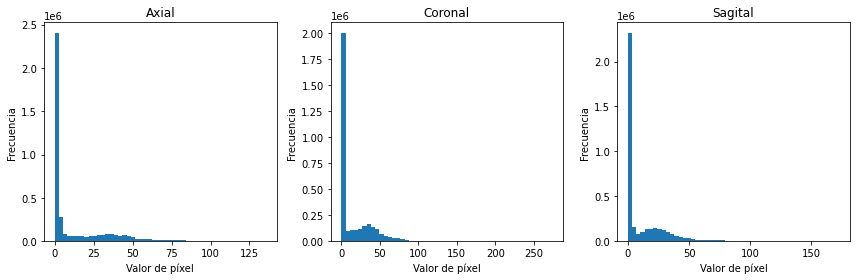

In [7]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la carpeta que contiene las imágenes .nii.gz
path_img_folder = '/home/veronicabp/Dataset/ATLAS_2/EyT (para el histograma)/sin procesar/'

# Obtener la lista de archivos en la carpeta
img_files = [file for file in os.listdir(path_img_folder) if file.endswith('.nii.gz')]

# Inicializar listas para almacenar los datos de píxeles de cada plano
axial_img_data = []
coronal_img_data = []
sagittal_img_data = []

# Iterar sobre cada archivo de imagen
for img_file in img_files:
    # Construir la ruta completa del archivo
    img_path = os.path.join(path_img_folder, img_file)
    
    # Cargar la imagen usando NiBabel
    img_data = nib.load(img_path).get_fdata()
    
    # Extraer datos de píxeles de cada plano y agregarlos a la lista correspondiente
    axial_plane = img_data[:, :, img_data.shape[2] // 2]  # Plano axial
    coronal_plane = img_data[:, img_data.shape[1] // 2, :]  # Plano coronal
    sagittal_plane = img_data[img_data.shape[0] // 2, :, :]  # Plano sagital
    
    axial_img_data.extend(axial_plane.flatten())
    coronal_img_data.extend(coronal_plane.flatten())
    sagittal_img_data.extend(sagittal_plane.flatten())

# Calcular histogramas para cada plano
axial_histogram, axial_bins = np.histogram(axial_img_data, bins=50, range=(0, np.max(axial_img_data)))
coronal_histogram, coronal_bins = np.histogram(coronal_img_data, bins=50, range=(0, np.max(coronal_img_data)))
sagittal_histogram, sagittal_bins = np.histogram(sagittal_img_data, bins=50, range=(0, np.max(sagittal_img_data)))

# Mostrar los histogramas
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(axial_img_data, bins=50, range=(0, np.max(axial_img_data)))
plt.title('Axial')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(coronal_img_data, bins=50, range=(0, np.max(coronal_img_data)))
plt.title('Coronal')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(sagittal_img_data, bins=50, range=(0, np.max(sagittal_img_data)))
plt.title('Sagital')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Para las imágenes procesadas

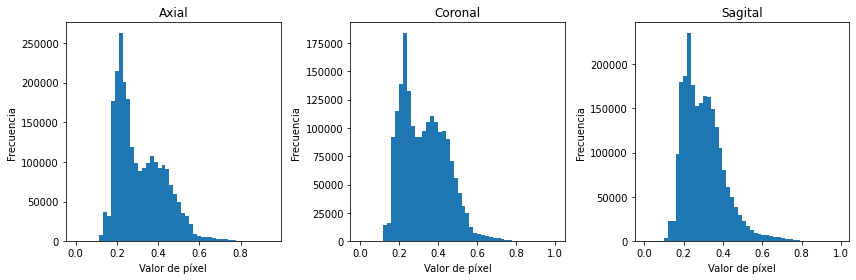

In [6]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la carpeta que contiene las imágenes .nii.gz
path_img_folder = '/home/veronicabp/Dataset/ATLAS_2/EyT (para el histograma)/HR/'

# Obtener la lista de archivos en la carpeta
img_files = [file for file in os.listdir(path_img_folder) if file.endswith('.nii.gz')]

# Inicializar listas para almacenar los datos de píxeles de cada plano
axial_img_data = []
coronal_img_data = []
sagittal_img_data = []

# Iterar sobre cada archivo de imagen
for img_file in img_files:
    # Construir la ruta completa del archivo
    img_path = os.path.join(path_img_folder, img_file)
    
    # Cargar la imagen usando NiBabel
    img_data = nib.load(img_path).get_fdata()
    
    # Extraer datos de píxeles de cada plano y agregarlos a la lista correspondiente
    axial_plane = img_data[:, :, img_data.shape[2] // 2]  # Plano axial
    coronal_plane = img_data[:, img_data.shape[1] // 2, :]  # Plano coronal
    sagittal_plane = img_data[img_data.shape[0] // 2, :, :]  # Plano sagital
    
    axial_img_data.extend(axial_plane.flatten())
    coronal_img_data.extend(coronal_plane.flatten())
    sagittal_img_data.extend(sagittal_plane.flatten())

# Calcular histogramas para cada plano
axial_histogram, axial_bins = np.histogram(axial_img_data, bins=50, range=(0, np.max(axial_img_data)))
coronal_histogram, coronal_bins = np.histogram(coronal_img_data, bins=50, range=(0, np.max(coronal_img_data)))
sagittal_histogram, sagittal_bins = np.histogram(sagittal_img_data, bins=50, range=(0, np.max(sagittal_img_data)))

# Mostrar los histogramas
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(axial_img_data, bins=50, range=(0, np.max(axial_img_data)))
plt.title('Axial')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(coronal_img_data, bins=50, range=(0, np.max(coronal_img_data)))
plt.title('Coronal')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(sagittal_img_data, bins=50, range=(0, np.max(sagittal_img_data)))
plt.title('Sagital')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()